In [1]:
import torch

In [2]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


#Generate data

In [3]:
import random
lstX = []
lstY = []
for x in range(-100, 100, 5):
  lstX.append([x])
  y = 3*x + random.uniform(0, 1)*100
  lstY.append([y])

In [4]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(40, 1) (40, 1)


In [5]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY_hat.shape, testY_hat.shape)

(32, 1) (8, 1) (32, 1) (8, 1)


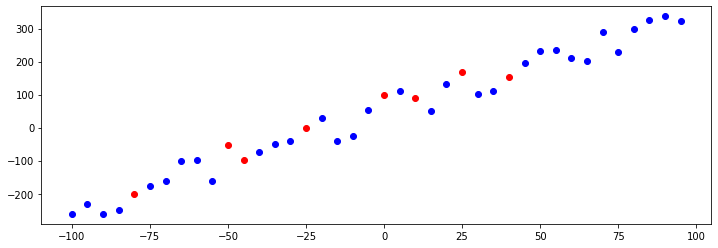

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.scatter(trainX, trainY_hat, color = "blue")
plt.scatter(testX, testY_hat, color = "red")
plt.show()

# Build NN

In [7]:
import torch.nn as nn

In [8]:
MyNet = nn.Sequential(
    nn.Linear(1, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)


In [9]:
for param in MyNet.parameters():
  if param.requires_grad:
    print(param.data)

tensor([[-3.6388e-01],
        [-1.3515e-01],
        [-8.0830e-01],
        [-4.1849e-01],
        [ 4.2882e-01],
        [-4.9665e-01],
        [-1.4656e-01],
        [ 3.2165e-01],
        [ 8.5845e-01],
        [-1.9378e-02],
        [ 7.0685e-01],
        [-2.2404e-01],
        [-4.4012e-02],
        [ 1.8487e-01],
        [-4.0105e-02],
        [ 6.5612e-01],
        [ 7.1465e-02],
        [-9.8813e-01],
        [ 7.3302e-04],
        [-8.2332e-01],
        [ 3.2103e-01],
        [-9.2020e-01],
        [ 9.5120e-01],
        [-8.5271e-01],
        [ 6.3402e-01],
        [ 8.3629e-01],
        [ 7.0440e-01],
        [-5.5231e-01],
        [ 2.1772e-01],
        [ 2.6316e-01],
        [-4.4797e-01],
        [ 6.1076e-01],
        [ 5.9473e-01],
        [-9.6824e-01],
        [ 1.2712e-01],
        [ 2.4668e-01],
        [ 5.2613e-01],
        [-6.5229e-01],
        [ 9.8555e-01],
        [ 6.0403e-02],
        [-7.2254e-01],
        [ 2.7451e-01],
        [-5.8171e-01],
        [ 9

In [10]:
for name, param in MyNet.named_parameters():
  if(param.requires_grad):
    torch.nn.init.normal_(param, mean=0.0, std=0.002)
    print(param)

Parameter containing:
tensor([[ 8.4151e-04],
        [ 4.9550e-03],
        [ 2.4471e-04],
        [-3.6172e-04],
        [-7.6600e-05],
        [ 1.1337e-03],
        [ 4.8190e-04],
        [ 3.5918e-04],
        [-1.4908e-03],
        [-9.8162e-04],
        [-1.1934e-03],
        [ 1.2003e-04],
        [ 5.7608e-04],
        [-1.9158e-04],
        [-3.4546e-03],
        [ 7.0318e-04],
        [-5.7053e-04],
        [ 9.7529e-04],
        [-3.3110e-03],
        [ 2.4968e-03],
        [-3.9680e-03],
        [ 1.7987e-03],
        [-6.1838e-06],
        [ 1.2498e-03],
        [-1.4789e-04],
        [ 1.1250e-03],
        [ 1.8907e-03],
        [-1.8977e-03],
        [-2.6095e-03],
        [-2.1138e-03],
        [ 4.2384e-04],
        [ 2.1021e-03],
        [ 4.8667e-04],
        [-7.3696e-03],
        [ 1.9793e-03],
        [-2.1027e-03],
        [-1.3618e-04],
        [-2.1560e-03],
        [ 1.4053e-03],
        [-3.2289e-05],
        [-1.1013e-03],
        [ 6.8814e-04],
        [-3.

In [11]:
loss_func = torch.nn.MSELoss()

In [12]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# Train N epoches

In [13]:
tensor_trainX = torch.FloatTensor(trainX).to(device)
tensor_trainY_hat = torch.FloatTensor(trainY_hat).to(device)

In [14]:
lossLst = []
for epoch in range(1, 500):
    tensor_trainY = MyNet(tensor_trainX)
    loss = loss_func(tensor_trainY, tensor_trainY_hat)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

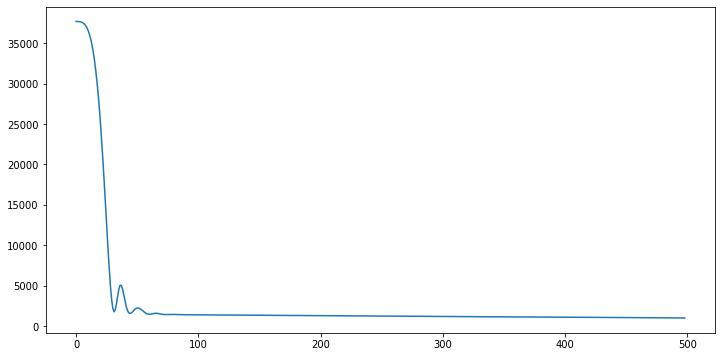

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

##Training data performance

In [16]:
tensor_trainY = MyNet(tensor_trainX)
loss = loss_func(tensor_trainY, tensor_trainY_hat)
print("%.2f" % (float(loss)))

1012.30


In [17]:
trainY = tensor_trainY.detach().cpu().numpy()

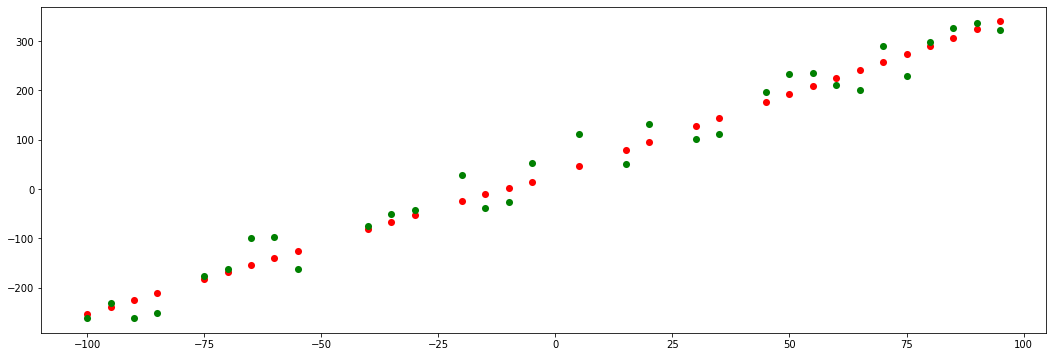

In [18]:
plt.figure(figsize=(18, 6))
plt.scatter(trainX, trainY, s=50, lw=0, color="red")
plt.scatter(trainX, trainY_hat, s=50, lw=0, color="green")
plt.show()

# Test data performance

In [19]:
tensor_testX = torch.FloatTensor(testX).to(device)
tensor_testY_hat = torch.FloatTensor(testY_hat).to(device)
tensor_testY = MyNet(tensor_testX)
loss = loss_func(tensor_testY, tensor_testY_hat)
print("%.2f" % (float(loss)))

1702.57


In [20]:
testY = tensor_testY.detach().cpu().numpy()

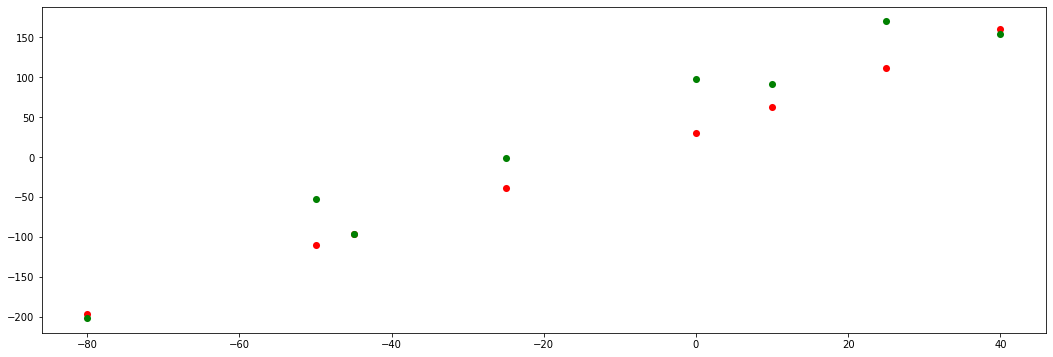

In [21]:
plt.figure(figsize=(18, 6))
plt.scatter(testX, testY, s=50, lw=0, color="red")
plt.scatter(testX, testY_hat, s=50, lw=0, color="green")
plt.show()